In [3]:
# Ë≥áÊñôÊ∏ÖÁêÜ
# ÂÆâË£ùÂ•ó‰ª∂
!pip install nltk pandas

# ËºâÂÖ•Â•ó‰ª∂
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords

# ‰∏ãËºâ NLTK ÂÅúÁî®Ë©û
nltk.download('stopwords')

# ‰∏äÂÇ≥ CSV Ê™îÊ°à
from google.colab import files
uploaded = files.upload()

# ËÆÄÂèñÊ™îÊ°à
df = pd.read_csv("sentiment_data.csv")

# ÂÆöÁæ©ÂâçËôïÁêÜÂáΩÊï∏
def preprocess_text(text):
    text = str(text).lower()  # ÂÖ®ËΩâÂ∞èÂØ´
    text = re.sub(r"http\S+", "", text)  # ÁßªÈô§Á∂≤ÂùÄ
    text = text.translate(str.maketrans("", "", string.punctuation))  # ÂéªÈô§Ê®ôÈªû
    tokens = text.split()
    tokens = [word for word in tokens if word not in stopwords.words("english")]  # ÂéªÈô§ÂÅúÁî®Ë©û
    return " ".join(tokens)

# Âü∑Ë°åÂâçËôïÁêÜ
df["cleaned_comment"] = df["comment"].apply(preprocess_text)

# È†êË¶ΩÁµêÊûú
df[["comment", "cleaned_comment"]].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


comment  \
0  lets forget apple pay required brand new iphon...   
1  nz retailers don?Ó®Ñ even contactless credit car...   
2  forever acknowledge channel help lessons ideas...   
3  whenever go place doesn?Ó®Ñ take apple pay doesn...   
4  apple pay convenient secure easy use used kore...   

                                     cleaned_comment  
0  lets forget apple pay required brand new iphon...  
1  nz retailers donÓ®Ñ even contactless credit card...  
2  forever acknowledge channel help lessons ideas...  
3  whenever go place doesnÓ®Ñ take apple pay doesnÓ®Ñ...  
4  apple pay convenient secure easy use used kore...

In [4]:
# ÂÑ≤Â≠òÊ∏ÖÁêÜÂæåÁöÑË≥áÊñô
df.to_csv("cleaned_sentiment_data.csv", index=False)

# ‰∏ãËºâÊ™îÊ°àÂà∞Êú¨Âú∞Á´Ø
files.download("cleaned_sentiment_data.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
# ÂÆâË£ùÂøÖË¶ÅÂ•ó‰ª∂ÔºàËã•Â∞öÊú™ÂÆâË£ùÔºâ
!pip install scikit-learn pandas matplotlib --quiet

# ÂåØÂÖ•Â•ó‰ª∂
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

<ipython-input-7-429507b11c2d>:10: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  full_df = pd.read_csv("cleaned_sentiment140.csv", encoding="ISO-8859-1", header=None)
<ipython-input-7-429507b11c2d>:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  full_df['target'] = full_df['target'].replace({4: 1})


Validation Accuracy: 0.7520


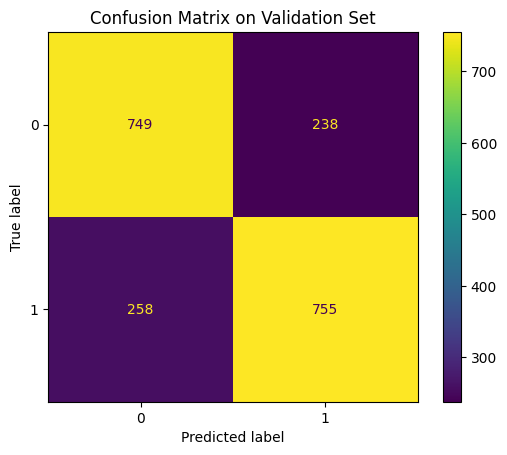

In [7]:
# ========== Á¨¨ 1 ÈÉ®ÂàÜÔºöË®ìÁ∑¥Ê®°Âûã ==========

# Ëá™Ë®ÇÊ∏ÖÁêÜÊñáÂ≠óÁöÑÂáΩÂºè
def clean_text(text):
    text = re.sub(r"http\S+", "", text)  # ÁßªÈô§Á∂≤ÂùÄ
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # ÁßªÈô§Ê®ôÈªû„ÄÅÁ¨¶Ëôü„ÄÅÊï∏Â≠ó
    return text.lower().strip()

# ËÆÄÂèñ sentiment140 ÂéüÂßãË≥áÊñôÔºàÂåÖÂê´ 0 Ëàá 4 Ê®ôÁ±§Ôºâ
full_df = pd.read_csv("cleaned_sentiment140.csv", encoding="ISO-8859-1", header=None)
full_df = full_df[[0, 5]]
full_df.columns = ['target', 'text']

# ÁØ©ÈÅ∏ 0 Ëàá 4 È°ûÂà•ÔºåËΩâÁÇ∫ 0=negative, 1=positive
full_df = full_df[full_df['target'].isin([0, 4])]
full_df['target'] = full_df['target'].replace({4: 1})

# ÂêÑÂèñÊ®£ 5000 Á≠ÜÊ≠£Èù¢/Ë≤†Èù¢
df_pos = full_df[full_df['target'] == 1].sample(5000, random_state=42)
df_neg = full_df[full_df['target'] == 0].sample(5000, random_state=42)
train_df = pd.concat([df_pos, df_neg]).sample(frac=1, random_state=42).reset_index(drop=True)

# Ê∏ÖÁêÜÊñáÂ≠ó
train_df['text'] = train_df['text'].apply(clean_text)

# ÊãÜÊàê X Âíå y
X = train_df['text']
y = train_df['target']

# ÊãÜÊàêË®ìÁ∑¥/È©óË≠âÈõÜ
X_train_text, X_val_text, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# ÂêëÈáèÂåñÔºö‰ΩøÁî® TF-IDF + n-gram (1,2)
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=10000)
X_train_vec = vectorizer.fit_transform(X_train_text)
X_val_vec = vectorizer.transform(X_val_text)

# Ë®ìÁ∑¥Ê®°Âûã
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

# È©óË≠âÈõÜÈ†êÊ∏¨ + Ë©ï‰º∞
y_pred = model.predict(X_val_vec)
acc = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {acc:.4f}")

# È°ØÁ§∫Ê∑∑Ê∑ÜÁü©Èô£
ConfusionMatrixDisplay(confusion_matrix(y_val, y_pred)).plot()
plt.title("Confusion Matrix on Validation Set")
plt.show()

In [8]:
# ========== Á¨¨ 2 ÈÉ®ÂàÜÔºöËºâÂÖ•ÁïôË®Ä‰∏¶È†êÊ∏¨ ========== variable part

# ËºâÂÖ•ÁïôË®ÄË≥áÊñô
comments_df = pd.read_csv("cleaned_sentiment_data.csv")

# ÈÅéÊøæÊéâÁ©∫ÁôΩÁïôË®ÄÔºà‰ΩøÁî® cleaned_comment Ê¨Ñ‰ΩçÔºâ
comments_df = comments_df[comments_df['cleaned_comment'].str.strip().astype(bool)]

# ÂèñÂá∫ cleaned_comment Ê¨Ñ‰Ωç‰ΩúÁÇ∫Ëº∏ÂÖ•ÊñáÊú¨
X_comments_text = comments_df['cleaned_comment']

# ‰ΩøÁî®ËàáË®ìÁ∑¥ÊôÇÁõ∏ÂêåÁöÑ vectorizer ËΩâÊèõ
X_comments_text = X_comments_text.fillna("")
X_comments_vec = vectorizer.transform(X_comments_text)

# È†êÊ∏¨
preds = model.predict(X_comments_vec)

# Â∞á 0/1 ËΩâÁÇ∫ÊñáÂ≠óÊ®ôÁ±§
pred_labels = np.where(preds == 1, 'positive', 'negative')

# ÂÑ≤Â≠òÁµêÊûú
results_df = pd.DataFrame({
    'comment': X_comments_text,
    'prediction': pred_labels
})

results_df.to_csv("predicted_comments.csv", index=False)

# È°ØÁ§∫ÂâçÂπæÁ≠Ü
print(results_df.head())


                                             comment prediction
0  lets forget apple pay required brand new iphon...   positive
1  nz retailers donÓ®Ñ even contactless credit card...   positive
2  forever acknowledge channel help lessons ideas...   positive
3  whenever go place doesnÓ®Ñ take apple pay doesnÓ®Ñ...   negative
4  apple pay convenient secure easy use used kore...   negative


In [9]:
# test part
test_sentences = [
    "This is a disaster. Completely foolish move.",
    "let‚Äôs see really helps economy",
    "I want to suicide"
]

X_test = vectorizer.transform(test_sentences)
preds = model.predict(X_test)
print(preds)

[0 1 0]


In [10]:
# Áµ±Ë®àÊ≠£Èù¢ / Ë≤†Èù¢Êï∏Èáè
from collections import Counter

counter = Counter(pred_labels)
positive_count = counter['positive']
negative_count = counter['negative']
total = positive_count + negative_count

print(f"Positive: {positive_count} ({positive_count / total:.2%})")
print(f"Negative: {negative_count} ({negative_count / total:.2%})")

# Âä†‰∏ä‰∏ÄÊÆµÊñáÂ≠óÁµêË´ñ
if positive_count>negative_count:
    print("Êï¥È´îÊÉÖÁ∑íÂÅèÊ≠£Èù¢„ÄÇ")
elif negative_count>positive_count:
    print("Êï¥È´îÊÉÖÁ∑íÂÅèË≤†Èù¢„ÄÇ")
else:
    print("Êï¥È´îÊÉÖÁ∑íÂπ≥Âùá„ÄÇ")


Positive: 148103 (61.42%)
Negative: 93042 (38.58%)
Êï¥È´îÊÉÖÁ∑íÂÅèÊ≠£Èù¢„ÄÇ


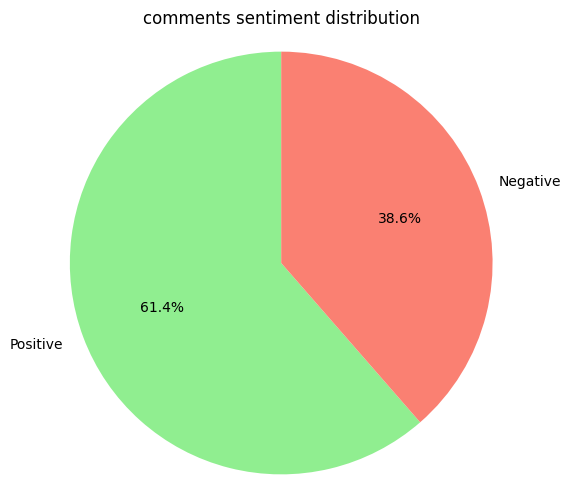

In [11]:
# Ë¶ñË¶∫ÂåñÊ≠£Èù¢/Ë≤†Èù¢ÊÉÖÁ∑íÂàÜ‰Ωà
import matplotlib.pyplot as plt

labels = ['Positive', 'Negative']
sizes = [positive_count, negative_count]
colors = ['lightgreen', 'salmon']

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title("comments sentiment distribution")
plt.axis('equal')  # ËÆìÂúìÂΩ¢‰∏çÊúÉË¢´ÊãâÈï∑
plt.show()




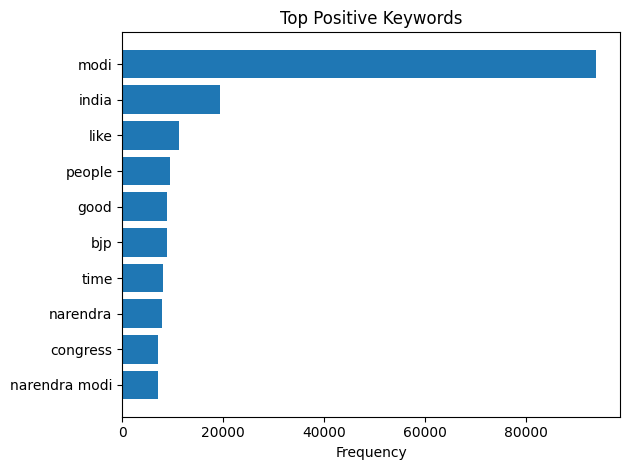

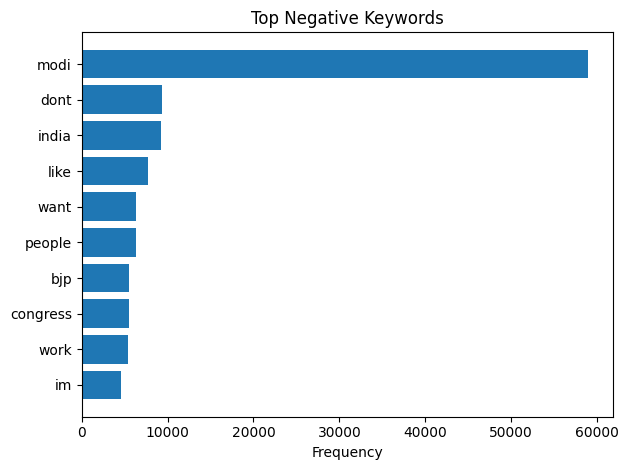

In [19]:
# ---------- ‰æùË≥¥Â•ó‰ª∂ ----------
import pandas as pd, re, matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

df = pd.read_csv("predicted_comments.csv")
TOP_K     = 10

# ---------- Á∞°ÊòìÊ∏ÖÁêÜ ----------
def clean(text):
    text = str(text) if not isinstance(text, str) else text
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    return text.lower()

df["clean"] = df["comment"].map(clean)

# ---------- ÂèñÈóúÈçµË©û ----------
def top_words(series, k):
    cv   = CountVectorizer(stop_words="english", ngram_range=(1,2), max_features=10000)
    mat  = cv.fit_transform(series)
    freq = mat.sum(axis=0).A1
    vocab= cv.get_feature_names_out()
    top  = sorted(zip(vocab, freq), key=lambda x: x[1], reverse=True)[:k]
    words, counts = zip(*top) if top else ([],[])
    return list(words)[::-1], list(counts)[::-1]    # ÂèçËΩâËÆì barh ÂæûÂ§ßÂà∞Â∞è

pos_w, pos_c = top_words(df.loc[df.prediction=="positive","clean"], TOP_K)
neg_w, neg_c = top_words(df.loc[df.prediction=="negative","clean"], TOP_K)

# ---------- Áï´Âúñ ----------
plt.figure()
plt.barh(pos_w, pos_c)
plt.title("Top Positive Keywords")
plt.xlabel("Frequency")
plt.tight_layout()
plt.show()

plt.figure()
plt.barh(neg_w, neg_c)
plt.title("Top Negative Keywords")
plt.xlabel("Frequency")
plt.tight_layout()
plt.show()


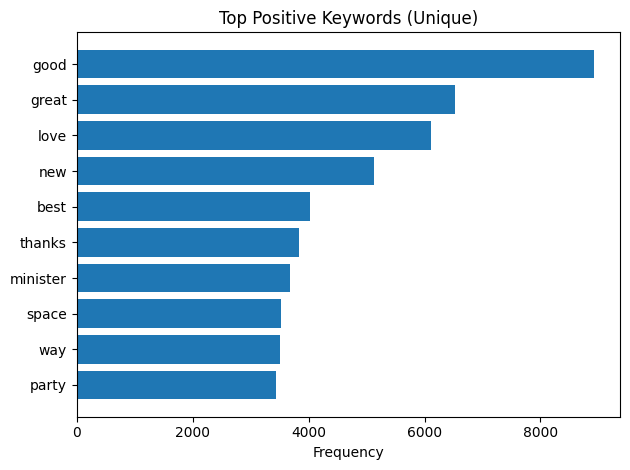

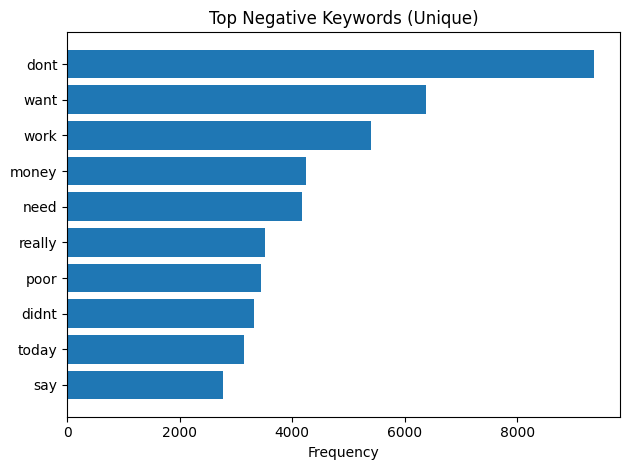

Ê≠§Ë≤ºÊñáÂÖ±Êúâ 241145 ÂâáÁïôË®ÄÔºåpositive È°ûÂà• 148103 ÂâáÔºàÂç† 61.4%Ôºâ„ÄÇ‰∏ªË¶ÅÈóúÈçµË©ûÁÇ∫ good, great, love, new, bestÔºåÈ°ØÁ§∫ÁïôË®ÄËÄÖÂ§öËÅöÁÑ¶‰∏äËø∞Ë≠∞È°åÔºåÂõ†Ê≠§Êï¥È´îÊÉÖÁ∑íÂÅèÊ≠£Èù¢„ÄÇ


In [18]:
# ---------- Êñ∞Â¢ûÂäüËÉΩÔºöÊéíÈô§Ê≠£Ë≤†Èù¢ÂÖ±ÈÄöÈóúÈçµË©û ----------

# Âª∫Á´ãÂÆåÊï¥Ë©ûÈ†ªÂ≠óÂÖ∏
pos_all_w, pos_all_c = top_words(df.loc[df.prediction=="positive","clean"], TOP_K*5)
neg_all_w, neg_all_c = top_words(df.loc[df.prediction=="negative","clean"], TOP_K*5)

# ËΩâÊàê dict Êñπ‰æøÊü•È†ªÁéá
pos_dict = dict(zip(pos_all_w, pos_all_c))
neg_dict = dict(zip(neg_all_w, neg_all_c))

# ÊâæÂá∫Ê≠£Èù¢Áç®Êúâ„ÄÅË≤†Èù¢Áç®ÊúâÁöÑË©û
unique_pos = [(w, c) for w, c in pos_dict.items() if w not in neg_dict]
unique_neg = [(w, c) for w, c in neg_dict.items() if w not in pos_dict]

# ÊåëÂâç TOP_K
unique_pos = sorted(unique_pos, key=lambda x: x[1], reverse=True)[:TOP_K]
unique_neg = sorted(unique_neg, key=lambda x: x[1], reverse=True)[:TOP_K]

# ÊãÜÈñãË©ûËàáÈ†ªÁéá
pos_w_unique, pos_c_unique = zip(*unique_pos) if unique_pos else ([], [])
neg_w_unique, neg_c_unique = zip(*unique_neg) if unique_neg else ([], [])

# ---------- Áï´ÂúñÔºàÁßªÈô§ÂÖ±ÈÄöË©ûÂæåÁöÑÔºâ ----------
plt.figure()
plt.barh(pos_w_unique[::-1], pos_c_unique[::-1])
plt.title("Top Positive Keywords (Unique)")
plt.xlabel("Frequency")
plt.tight_layout()
plt.show()

plt.figure()
plt.barh(neg_w_unique[::-1], neg_c_unique[::-1])
plt.title("Top Negative Keywords (Unique)")
plt.xlabel("Frequency")
plt.tight_layout()
plt.show()

# ---------- ÁîüÊàêÊïòËø∞Áî®ÁöÑ‰∫îÂÄãÈóúÈçµË©û ----------
if major == "positive":
    target_words = unique_pos
else:
    target_words = unique_neg

# ÂèñÂâç‰∫îÂÄãË©û
words = [w for w, _ in target_words[:5]]
if len(words) < 5:
    words += ["..."] * (5 - len(words))

# ---------- ÁµÑÂêàÂè•Â≠ê ----------
explanation = (
    f"Ê≠§Ë≤ºÊñáÂÖ±Êúâ {cnt.sum()} ÂâáÁïôË®ÄÔºå{major} È°ûÂà• {major_n} ÂâáÔºàÂç† {ratio:.1%}Ôºâ„ÄÇ"
    f"‰∏ªË¶ÅÈóúÈçµË©ûÁÇ∫ {', '.join(words)}Ôºå"
    f"È°ØÁ§∫ÁïôË®ÄËÄÖÂ§öËÅöÁÑ¶‰∏äËø∞Ë≠∞È°åÔºåÂõ†Ê≠§Êï¥È´îÊÉÖÁ∑íÂÅè{'Ê≠£Èù¢' if major == 'positive' else 'Ë≤†Èù¢'}„ÄÇ"
)

print(explanation)



In [20]:
# pip install python-pptx pandas matplotlib scikit-learn --quiet
!pip install python-pptx

import pandas as pd, matplotlib.pyplot as plt, re, datetime as dt, warnings
from sklearn.feature_extraction.text import CountVectorizer
from pptx import Presentation
from pptx.util import Inches, Pt
from pptx.enum.text import PP_ALIGN

warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")

CSV_PATH = "predicted_comments.csv"
TOP_K    = 10                         # ÈóúÈçµË©ûÊéíÂêçÊï∏

# ---------- 1. ËÆÄÊ™î + Âü∫Êú¨Áµ±Ë®à ----------
df   = pd.read_csv(CSV_PATH)
cnt  = df["prediction"].value_counts()
pos, neg = cnt.get("positive", 0), cnt.get("negative", 0)
total    = pos + neg

# ---------- 2. ÂúìÈ§Ö & Êï¥È´îÈï∑Ê¢ù ----------
plt.figure()
plt.pie([pos, neg], labels=["Positive", "Negative"], autopct='%1.1f%%', startangle=90)
plt.axis('equal'); plt.tight_layout(); plt.savefig("pie.png"); plt.close()

plt.figure()
plt.bar(["Positive", "Negative"], [pos, neg])
plt.ylabel("Count"); plt.tight_layout(); plt.savefig("bar.png"); plt.close()

# ---------- 3. ÊäìÂêÑÈ°ûÂà• Top-K ÈóúÈçµË©û ----------
def clean(t): return re.sub(r"[^a-zA-Z\s]", " ", re.sub(r"http\S+", " ", str(t))).lower()
df["clean"] = df["comment"].map(clean)

def top_kw(series):
    cv = CountVectorizer(stop_words="english", ngram_range=(1,2), max_features=10000)
    mat = cv.fit_transform(series)
    freqs = mat.sum(axis=0).A1
    vocab = cv.get_feature_names_out()
    w, c  = zip(*sorted(zip(vocab, freqs), key=lambda x:x[1], reverse=True)[:TOP_K])
    return list(w)[::-1], list(c)[::-1]          # ÂèçËΩâÁµ¶ barh

p_w, p_c = top_kw(df.loc[df.prediction=="positive","clean"])
n_w, n_c = top_kw(df.loc[df.prediction=="negative","clean"])

for lbl, w_list, c_list in [("pos", p_w, p_c), ("neg", n_w, n_c)]:
    plt.figure()
    plt.barh(w_list, c_list)
    plt.xlabel("Frequency")
    plt.title("Top Positive Keywords" if lbl=="pos" else "Top Negative Keywords")
    plt.tight_layout()
    plt.savefig(f"{lbl}.png")
    plt.close()

# ---------- 4. ÁµêË´ñ ----------
ratio_pct = f"{major_n / cnt.sum() * 100:.1f}%"

explanation = (
    f"Ê≠§Ë≤ºÊñáÂÖ±Êúâ {cnt.sum()} ÂâáÁïôË®ÄÔºå{major} È°ûÂà• {major_n} ÂâáÔºàÂç† {ratio_pct}Ôºâ„ÄÇ"
    f"‰∏ªË¶ÅÈóúÈçµË©ûÁÇ∫ {', '.join(words)}Ôºå"
    f"È°ØÁ§∫ÁïôË®ÄËÄÖÂ§öËÅöÁÑ¶‰∏äËø∞Ë≠∞È°åÔºåÂõ†Ê≠§Êï¥È´îÊÉÖÁ∑íÂÅè{'Ê≠£Èù¢' if major=='positive' else 'Ë≤†Èù¢'}„ÄÇ"
)

conclusion = f"ÁµêË´ñÔºö{explanation}"

# ---------- 5. Áî¢Áîü PPT ----------

prs = Presentation()
prs.slides.add_slide(prs.slide_layouts[0])
prs.slides[0].shapes.title.text = "Social Post Sentiment Analysis"
prs.slides[0].placeholders[1].text = f"Generated: {dt.datetime.now():%Y-%m-%d %H:%M}"

for title, img in [("Sentiment Pie Chart","pie.png"),
                   ("Sentiment Bar Chart","bar.png"),
                   ("Top Positive Keywords","pos.png"),
                   ("Top Negative Keywords","neg.png")]:
    s = prs.slides.add_slide(prs.slide_layouts[5])
    s.shapes.title.text = title
    s.shapes.add_picture(img, Inches(1), Inches(1.3), width=Inches(8))

s = prs.slides.add_slide(prs.slide_layouts[1])
s.shapes.title.text = "Conclusion"
p = s.shapes.placeholders[1].text_frame.paragraphs[0]
p.text = conclusion; p.font.size = Pt(24); p.alignment = PP_ALIGN.LEFT

prs.save("sentiment_report.pptx")
print("‚úÖ PPT generated: sentiment_report.pptx")


   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 472.8/472.8 kB 23.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 169.4/169.4 kB 14.0 MB/s eta 0:00:00
‚úÖ PPT generated: sentiment_report.pptx


In [ ]:
#---------Ê∏ÖÁêÜÂáΩÁ§∫-----------
def clean(t):
    t = re.sub(r"http\S+", "", t) #ÁßªÈô§Á∂≤ÂùÄ
    t = re.sub(r"[^a-zA-Z\s]", "", t) #Âè™ÁïôÂ≠óÊØç
    return t.lower().strip()
#----------Âà§Êñ∑Âè•Â≠êÊÉÖÁ∑íÊ≠£Ë≤†Èù¢ÂáΩÁ§∫---------
def predict_sentiment(text):
    cleaned_text=clean(text) #Ê∏ÖÁêÜ
    vec=vectorizer.transform([text]) #ÂêëÈáèÂåñ
    predict=model.predict(vec)[0] #Â∏∂ÂÖ•Ê®°Âûã
    sentiment="positive" if predict == 1 else "negative"
    prob=model.predict_proba(vec)
    prob_positive=prob[0,1]
    prob_negative=prob[0,0]

    #--------ÊäìÈóúÈçµË©û--------
    feature_names=vectorizer.get_feature_names_out()
    coef=model.coef_[0]
    text_w=set(cleaned_text.split())
    w_contribute=[(word,coef[i]) for i, word in enumerate(feature_names) if word in text_w]
    w_contribute.sort(key=lambda x: abs(x[1]), reverse=True)

    #---------Ëº∏Âá∫ÁµêÊûú‰∏¶ÂàÜÊûê----------
    explanation=(
        f"Sentiment: {sentiment.capitalize()}\n"
        f"Probability(pos): {prob_positive:.2f} "
        f"Probability(neg): {prob_negative:.2f}\n"
        f"Contributing words:"
    )
    for word,coef in w_contribute[:5]:
            effect="Positive" if coef>0 else "Negative"
            explanation+=f" >{word}:{effect}({coef:.2f}) "
    if not w_contribute:
            explanation+="No contributin word found.\n"

    return explanation

#Ê∏¨Ë©¶
test=[
    "Exam tomorrow and I‚Äôm totally unprepared üò´",
    "Earthquake shook the house, so scared",
    "You dirty bastard stole my kill",
    "lol",
    "afsfwajnk"
]
for comment in test:
    print(f"Comment:{comment}\n"+predict_sentiment(comment)+"\n")


Comment:Exam tomorrow and I‚Äôm totally unprepared üò´
Sentiment: Negative
Probability(pos): 0.35 Probability(neg): 0.65
Contributing words: >tomorrow:Negative(-1.32)  >im:Negative(-1.18)  >and:Positive(0.64)  >exam:Negative(-0.62)  >totally:Negative(-0.12) 

Comment:Earthquake shook the house, so scared
Sentiment: Negative
Probability(pos): 0.28 Probability(neg): 0.72
Contributing words: >scared:Negative(-0.98)  >house:Negative(-0.48)  >so:Negative(-0.45)  >the:Positive(0.15) 

Comment:You dirty bastard stole my kill
Sentiment: Negative
Probability(pos): 0.42 Probability(neg): 0.58
Contributing words: >my:Negative(-2.35)  >you:Positive(2.13)  >stole:Negative(-0.41)  >kill:Negative(-0.32)  >bastard:Negative(-0.12) 

Comment:lol
Sentiment: Positive
Probability(pos): 0.90 Probability(neg): 0.10
Contributing words: >lol:Positive(2.05) 

Comment:afsfwajnk
Sentiment: Positive
Probability(pos): 0.54 Probability(neg): 0.46
Contributing words:No contributin word found.




In [ ]:
#---------CLI------------
while True:
    text=input("please enter your comment(or enter 0 to exit):")
    text=text.strip()
    if text.lower()=="0":
        break
    print(f"Comment:{text}\n"+predict_sentiment(text)+"\n")

Comment:I hate you
Sentiment: Negative
Probability(pos): 0.41 Probability(neg): 0.59
Contributing words: >hate:Negative(-2.33)  >you:Positive(2.13) 

